# Modeling Demo (Final Project)
*By Joely Nelson*

In this modeling demo, we demonstrate how the underlying model in our project works.

## Imports + Helper Functions
This cell imports the modeling functions as well as functions to plot the simulation and print numbers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models import *

def p(i):
    '''
    Returns a string representation of a number in a readable format surrounded by commas.
    '''
    return "{:,}".format(int(i))

def plot_simulation(t, v, start_date=None,
                    show_s=True,
                    show_e=True,
                    show_i=True,
                    show_r=True,
                    show_d=True,
                    show_v=True):
    '''
    Plots a given simulation from simulate region. Needs a time vector and the vector
    returned from simulate region, as well as a start date for vaccination.
    The show parameters, if True, will display the line associated with that population.
    If False, the line will be hidden.
    '''
    colors = ["#63d297", "#ffe599", "#fc972d", "#6d9eeb", "#990000", "#351c75"]
    labels = ['Suceptible', 'Exposed', 'Infected', 'Recovered', 'Dead', 'Vaccinated']
    show_bools = [show_s, show_e, show_i, show_r, show_d, show_v]
    for i in range(6):
        if show_bools[i]:
            item = v.T[i]
            label = labels[i]
            color = colors[i]
            plt.plot(t, item, label=label, color=color)
    if start_date != None:
        plt.axvline(x=start_date, color='black', alpha=0.5, linestyle='dashed', label='Vac start date')
    plt.legend(loc='best')
    plt.show()
    plt.clf()

## Comparing Two Simulations
Demo with the following differences
    * Vaccinations begin on date 300 vs 350
    * Vaccine efficacy is 0.6 vs 0.9 (Check for total days 450 vs 900)
    * Uptake percentage is 25% vs 100%
    * Vac_rate is 500,000 (5e5) per day vs 1,000,000 per day (5e6)

Number dead in simulation a:  1,333,143


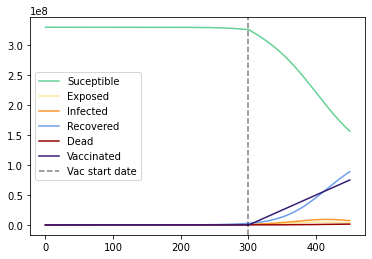

Number dead in simulation b:  848,473


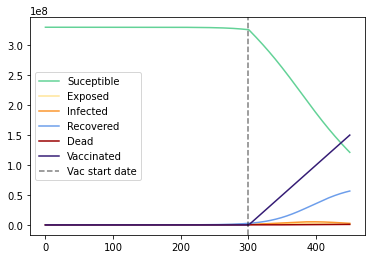

<Figure size 432x288 with 0 Axes>

In [2]:
# params kept the same
total_pop=3.3e8
mortality=0.015
reproduction_value=1.6
avg_exposed_days=5
avg_infected_days=10
total_num_days=450
vac_eff_d=0

# different simulations
vac_start_day_a = 300
vac_eff_i = 0.9
uptake_per = 1
vac_rate = 5e5
ta, va = simulate_region(total_pop, mortality, reproduction_value, avg_exposed_days, avg_infected_days, 
                    vac_start_day_a, vac_rate, uptake_per, total_num_days-vac_start_day_a,
                    vac_eff_i, vac_eff_d)

vac_start_day_b = 300
vac_eff_i = 0.9
uptake_per = 1
vac_rate = 1e6
tb, vb = simulate_region(total_pop, mortality, reproduction_value, avg_exposed_days, avg_infected_days, 
                    vac_start_day_b, vac_rate, uptake_per, total_num_days-vac_start_day_b,
                    vac_eff_i, vac_eff_d)

# this is how to get out each of the individual values
Sa,Ea,Ia,Ra,Da,Va = va.T
Sb,Eb,Ib,Rb,Db,Vb = vb.T

print("Number dead in simulation a: ", p(Da[-1]))
plot_simulation(ta, va, vac_start_day_a)

print("Number dead in simulation b: ", p(Db[-1]))
plot_simulation(tb, vb, vac_start_day_b)